In [19]:
import glob
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colormaps as cms

In [20]:
data = pd.read_csv("../logs/centralized/edges_2.csv",)

columns = data.columns
data.head()

,n_iterations,absolute_error,relative_error,total_path,average_path,exit_code,spawn_type
0,174,0.003246,0.081364,92.943064,46.471532,1,edges
1,160,0.003749,0.093985,84.812268,42.406134,2,edges
2,159,0.005313,0.133170,111.070314,55.535157,2,edges
3,171,0.000505,0.012650,105.922844,52.961422,2,edges
4,171,0.012371,0.310096,79.631316,39.815658,2,edges


In [21]:
def get_params_from_path(path: str):
    params = path.split('\\')[-1].split('_')
    n_particles = params[-1][:-4]
    
    spawn_type = " ".join(params[:-1])
    
    return int(n_particles), spawn_type

In [22]:
def compute_mean_and_std(files: list[str], column: str):
    storage = defaultdict(list)
    for file in files:
        n_particles, spawn_type = get_params_from_path(file)
        data = pd.read_csv(file)
        
        current_mean = np.mean(data[column])
        current_std = np.std(data[column])
        current_label = n_particles
        
        storage[spawn_type].append([current_mean, current_std, current_label])
    
    for current_spawn_type in storage.keys():
        storage[current_spawn_type] = sorted(storage[current_spawn_type], key = lambda x: x[2])
        storage[current_spawn_type] = np.array(storage[current_spawn_type])
    
    return storage

In [23]:
def plot_mean_and_std(storage, x_ticks_labels, title: str, xlabel: str):
    shift = 0.1
    fig, ax = plt.subplots(figsize=(5, 3))
    
    fig.canvas.draw()
    
    for index, key in enumerate(storage.keys()):
        plt.errorbar(np.arange(1, len(storage[key]) + 1) + index*shift, storage[key][:, 0], storage[key][:, 1],
                     linestyle='None', marker='.', label=key)
    plt.xticks(range(1, len(storage[key]) + 1))
    
    if x_ticks_labels is None:
        ax.set_xticklabels(storage[key][:, 2])
    else:
        ax.set_xticklabels(x_ticks_labels)
    
    plt.xlabel(xlabel)
    # plt.ylabel(title)
    ax.grid(which='major', alpha=0.5)
    
    locs, _ = plt.yticks()
    ax.set_yticks(locs, minor=False)
    
    minor_ticks = []
    for i in range(1, len(locs)):
        start = locs[i-1]
        finish = locs[i]
        for minor_tick in np.linspace(start, finish, 5, endpoint=False):
            minor_ticks.append(minor_tick)
        
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="minor", alpha=0.3)
    
    
    plt.legend(loc="best")
    plt.title(title)
    
    plt.show()

In [24]:
def get_radius(files):
    for file in files:
        yield float(file.split("\\")[-2].split("_")[-1])

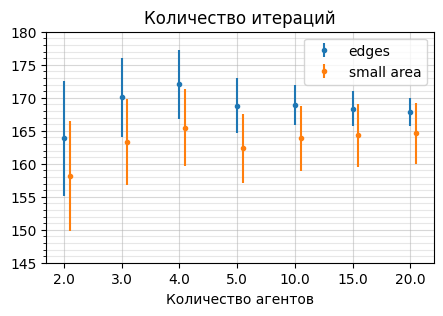

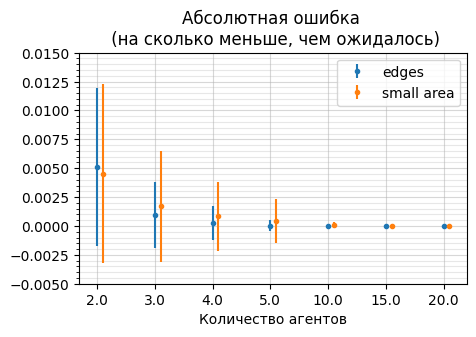

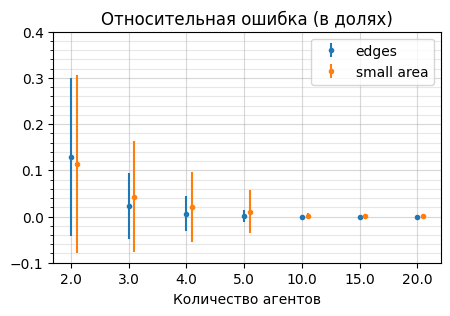

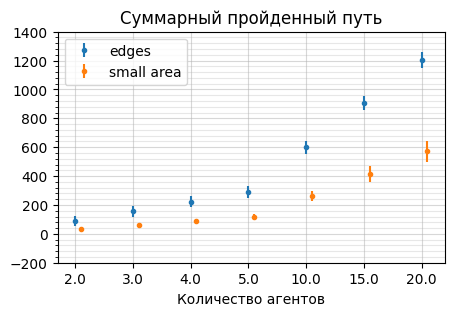

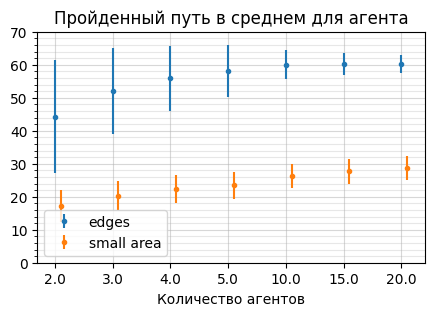

In [25]:
files_centralized = glob.glob(".././logs/centralized/*.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка \n (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]
details = ""

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_centralized, column)
    plot_mean_and_std(storage, None, title + details, "Количество агентов")

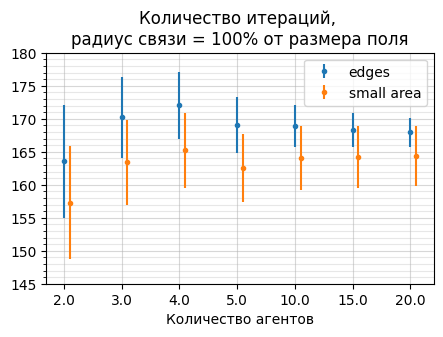

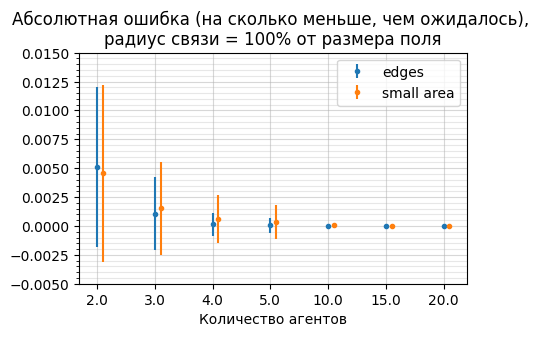

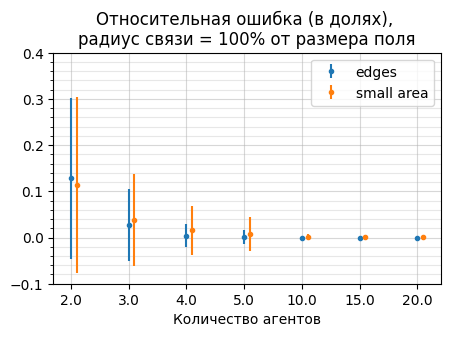

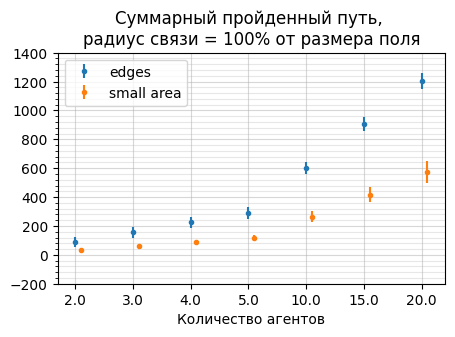

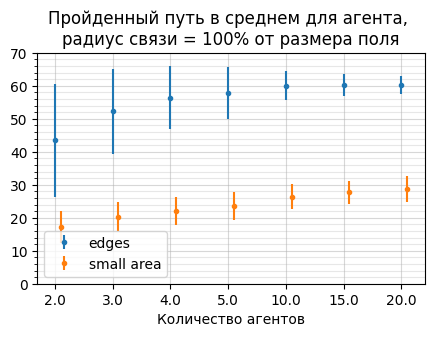

In [26]:
files_1 = glob.glob(".././logs/decentralized/r_1/*.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = "радиус связи = 100% от размера поля"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_1, column)
    plot_mean_and_std(storage, None, title + ", \n" + details, "Количество агентов")

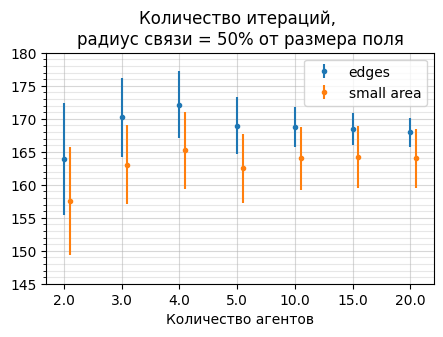

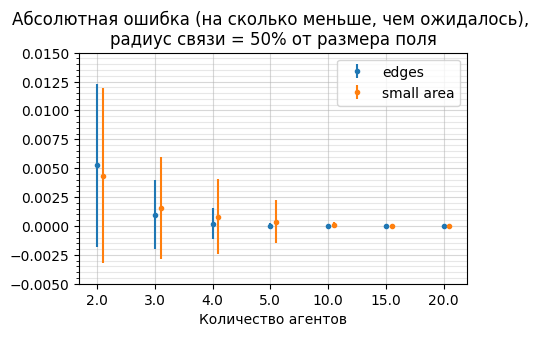

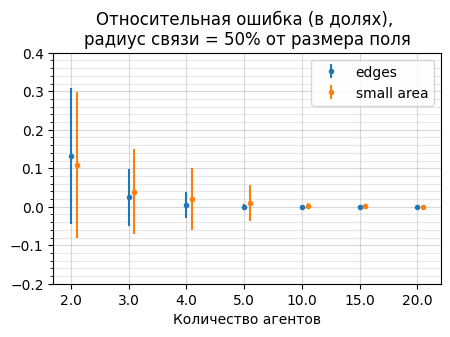

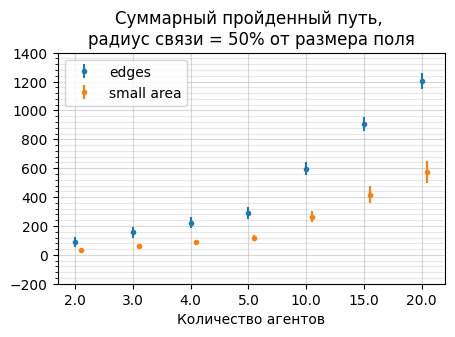

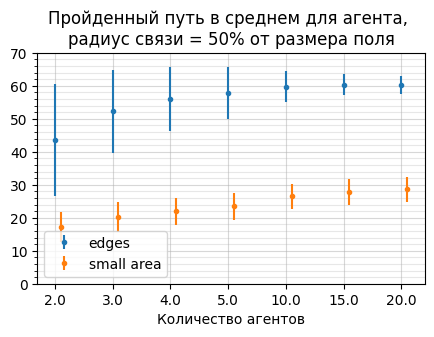

In [27]:
files_05 = glob.glob(".././logs/decentralized/r_0.5/*.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = "радиус связи = 50% от размера поля"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_05, column)
    plot_mean_and_std(storage, None, title + ", \n" + details, "Количество агентов")

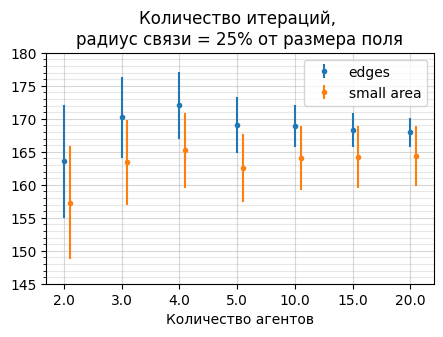

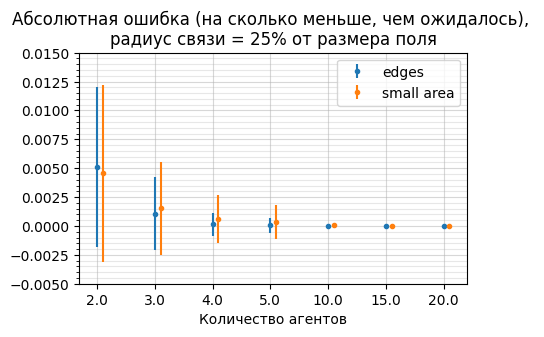

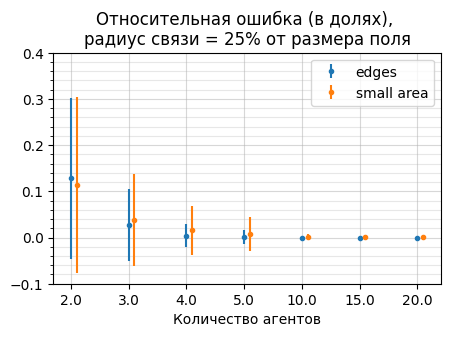

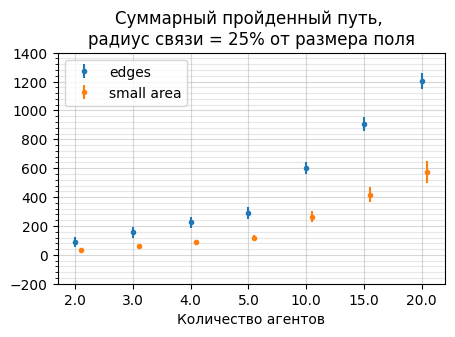

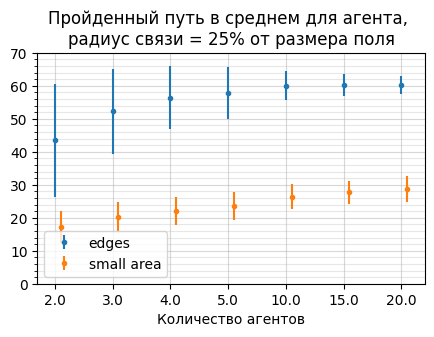

In [28]:
files_025 = glob.glob(".././logs/decentralized/r_0.25/*.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = "радиус связи = 25% от размера поля"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_1, column)
    plot_mean_and_std(storage, None, title + ", \n" + details, "Количество агентов")

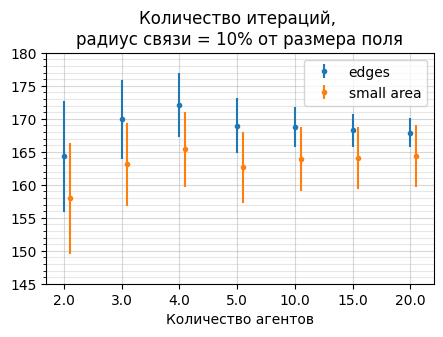

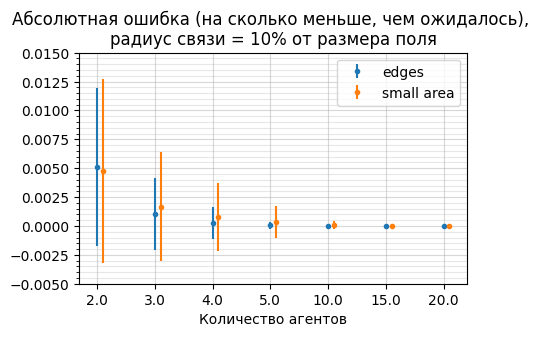

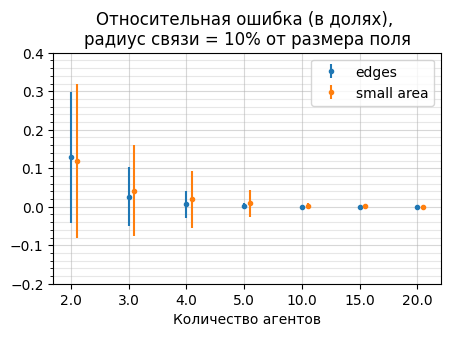

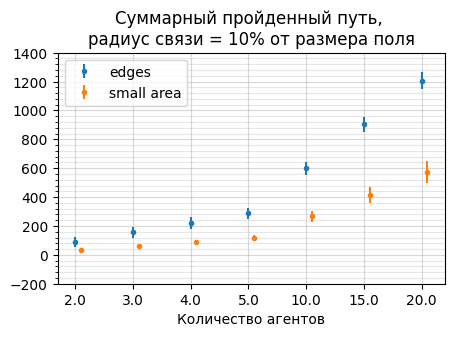

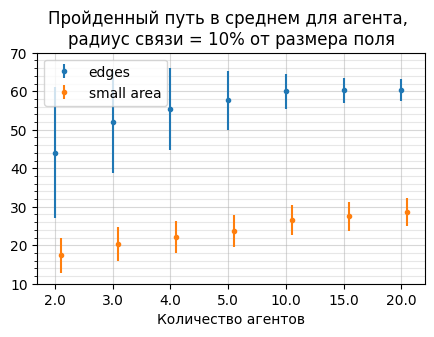

In [29]:
files_01 = glob.glob(".././logs/decentralized/r_0.1/*.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = "радиус связи = 10% от размера поля"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_01, column)
    plot_mean_and_std(storage, None, title + ", \n" + details, "Количество агентов")

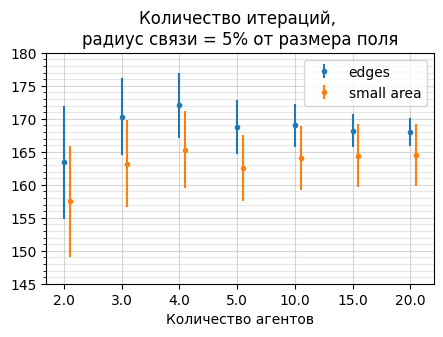

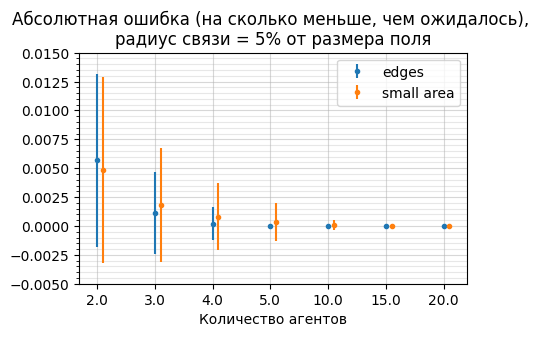

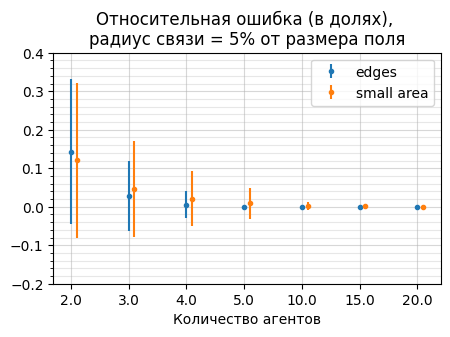

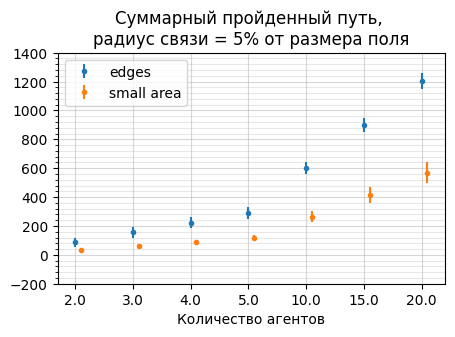

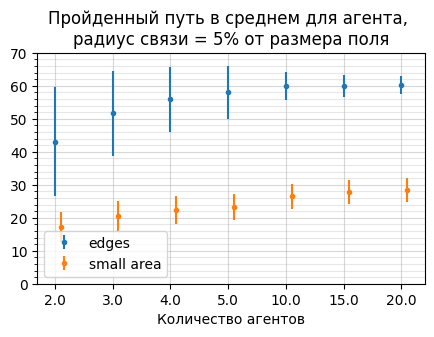

In [30]:
files_005 = glob.glob(".././logs/decentralized/r_0.05/*.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = "радиус связи = 5% от размера поля"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_005, column)
    plot_mean_and_std(storage, None, title + ", \n" + details, "Количество агентов")

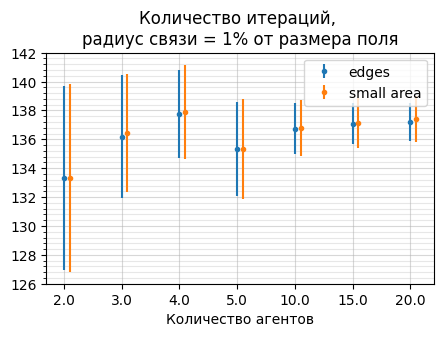

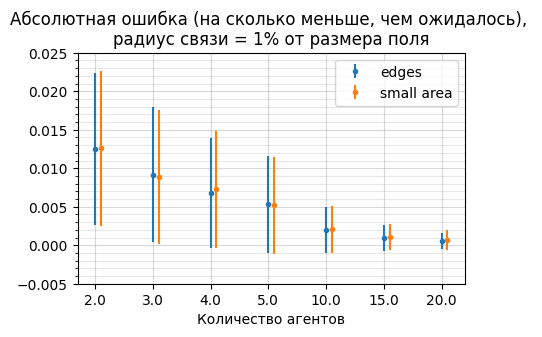

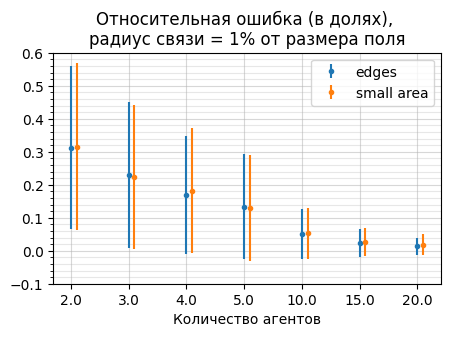

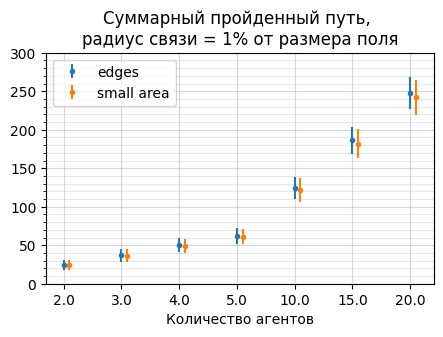

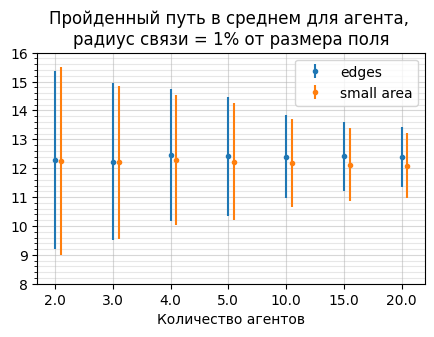

In [31]:
files_001 = glob.glob(".././logs/decentralized/r_0.01/*.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = "радиус связи = 1% от размера поля"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_001, column)
    plot_mean_and_std(storage, None, title + ", \n" + details, "Количество агентов")

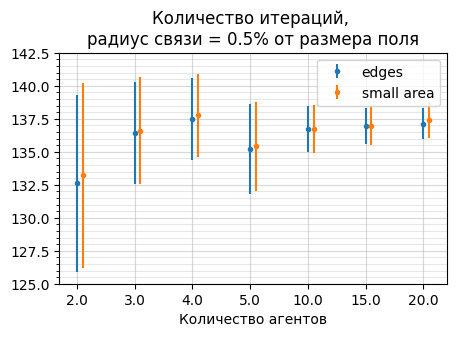

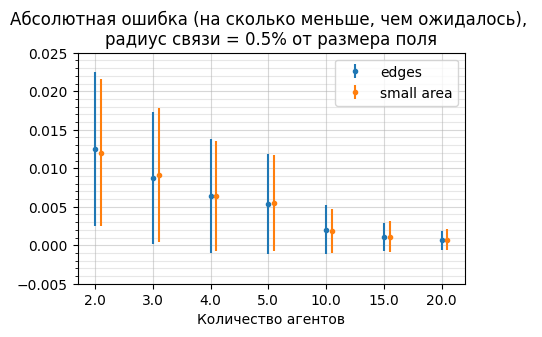

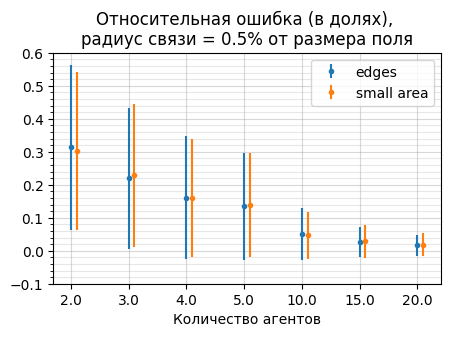

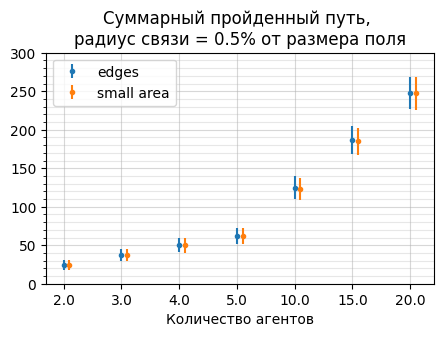

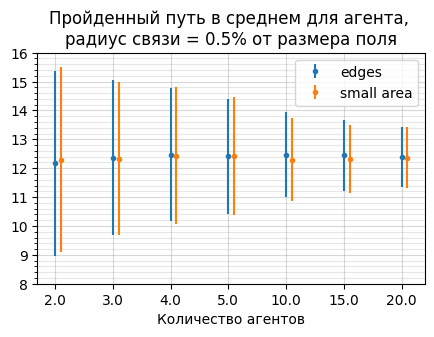

In [32]:
files_0005 = glob.glob(".././logs/decentralized/r_0.005/*.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = "радиус связи = 0.5% от размера поля"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_0005, column)
    plot_mean_and_std(storage, None, title + ", \n" + details, "Количество агентов")

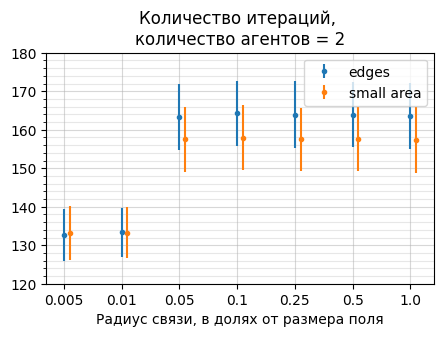

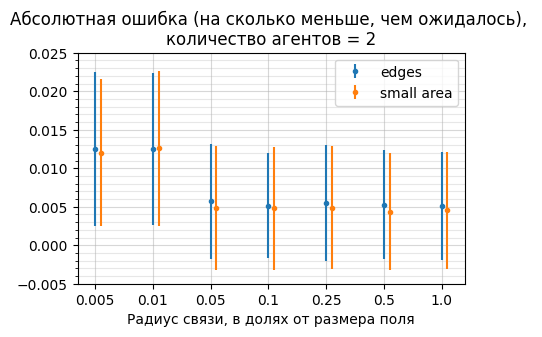

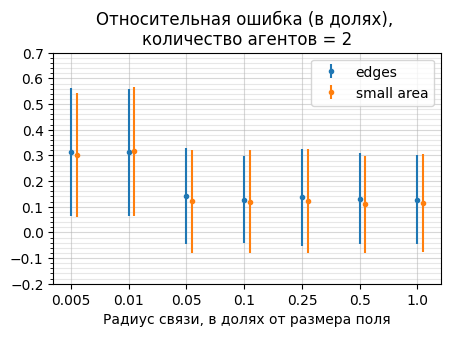

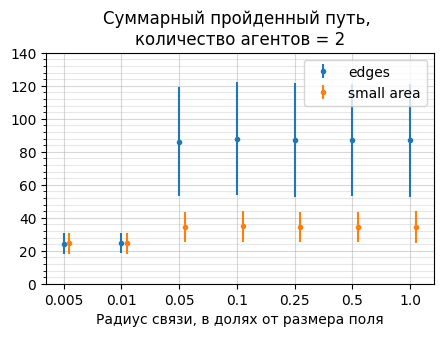

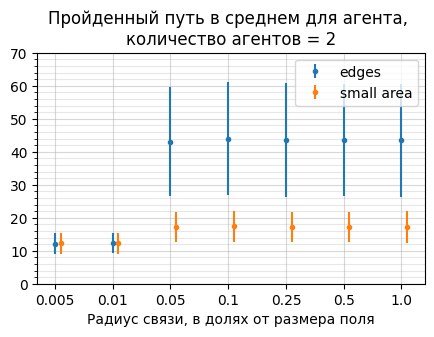

In [33]:
n = 2
files_n = glob.glob(f".././logs/decentralized/*/*_{n}.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = f"количество агентов = {n}"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_n, column)
    plot_mean_and_std(storage, np.unique(list(get_radius(files_n))), title + ", \n" + details,
                      "Радиус связи, в долях от размера поля")

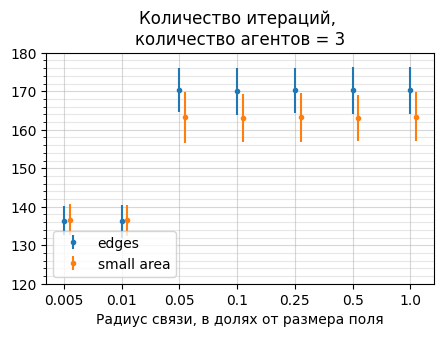

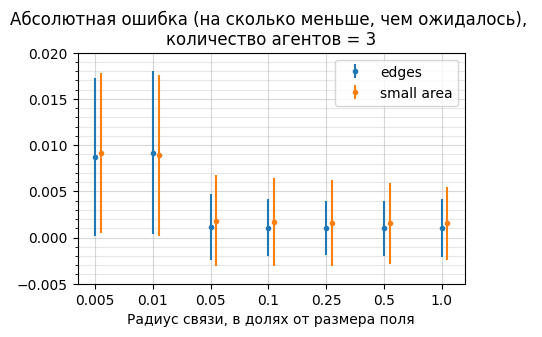

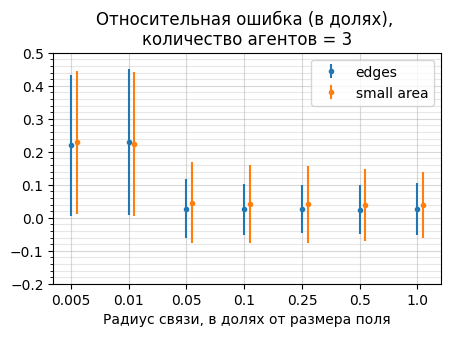

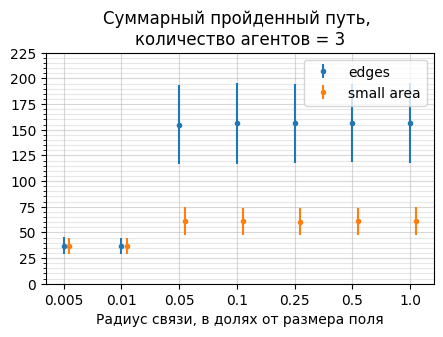

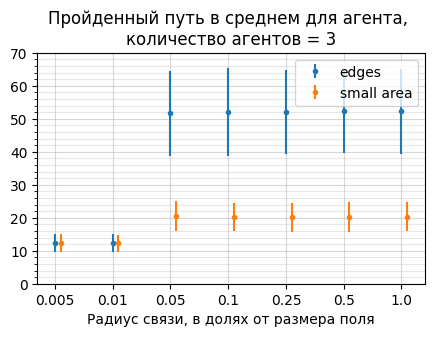

In [34]:
n = 3
files_n = glob.glob(f".././logs/decentralized/*/*_{n}.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = f"количество агентов = {n}"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_n, column)
    plot_mean_and_std(storage, np.unique(list(get_radius(files_n))), title + ", \n" + details,
                      "Радиус связи, в долях от размера поля")

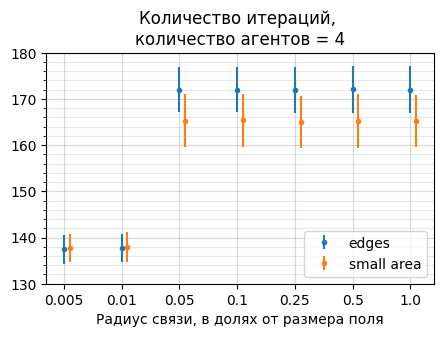

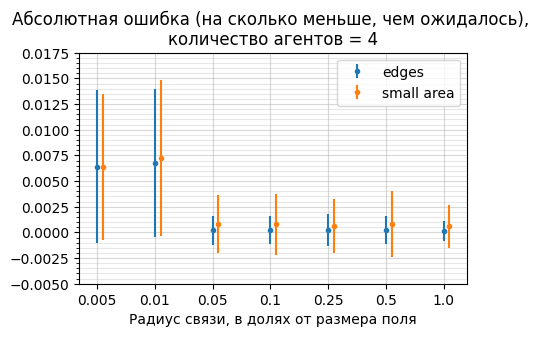

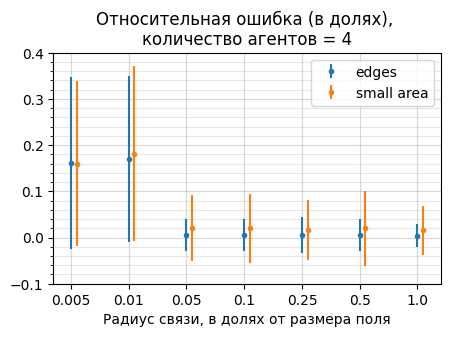

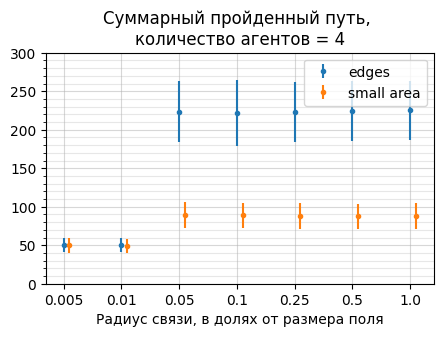

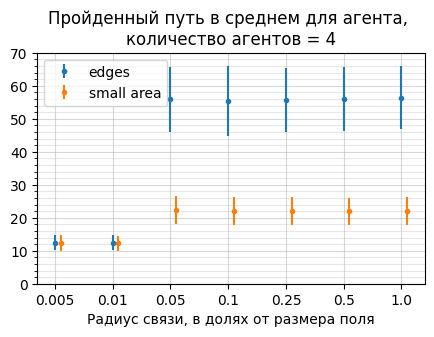

In [35]:
n = 4
files_n = glob.glob(f".././logs/decentralized/*/*_{n}.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = f"количество агентов = {n}"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_n, column)
    plot_mean_and_std(storage, np.unique(list(get_radius(files_n))), title + ", \n" + details,
                      "Радиус связи, в долях от размера поля")

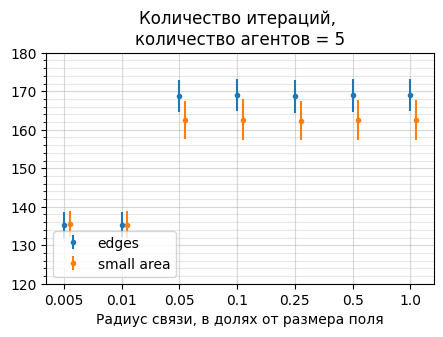

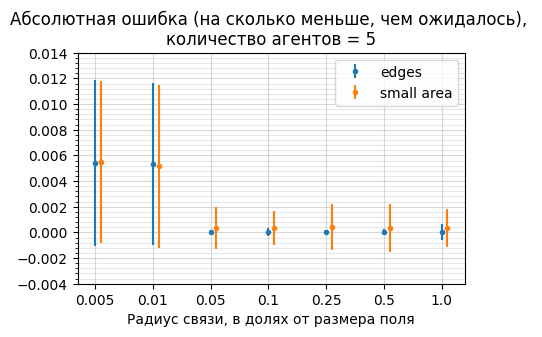

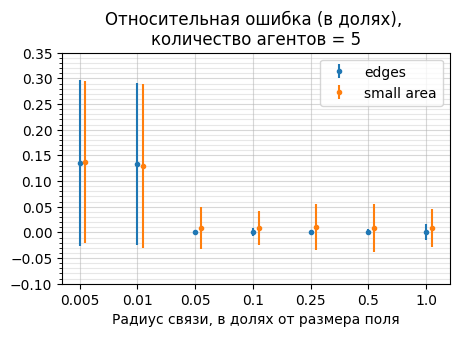

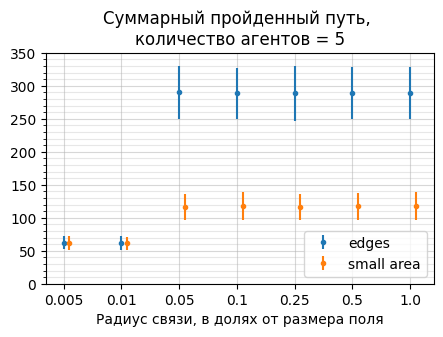

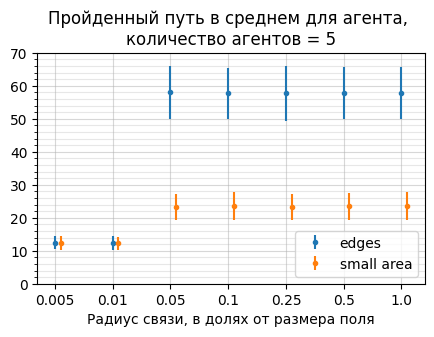

In [36]:
n = 5
files_n = glob.glob(f".././logs/decentralized/*/*_{n}.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = f"количество агентов = {n}"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_n, column)
    plot_mean_and_std(storage, np.unique(list(get_radius(files_n))), title + ", \n" + details,
                      "Радиус связи, в долях от размера поля")

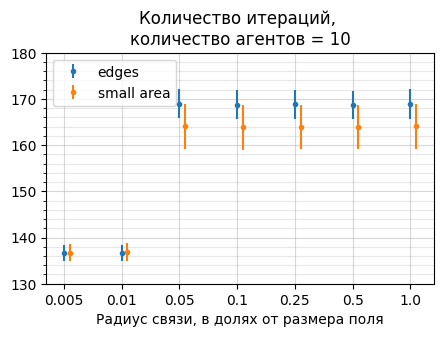

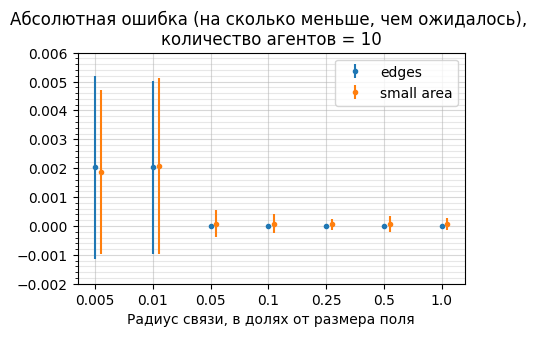

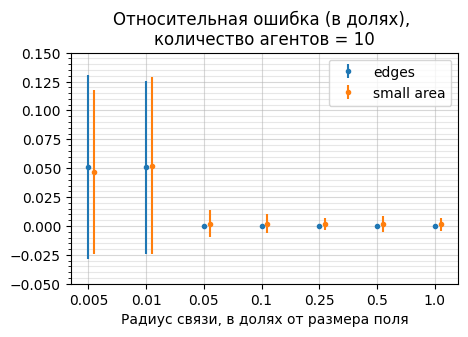

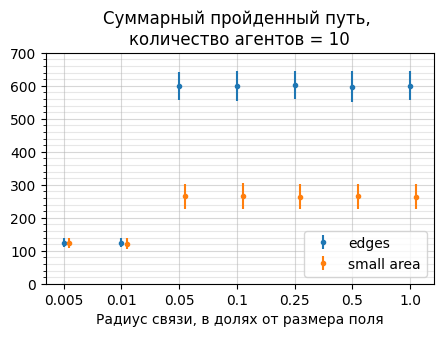

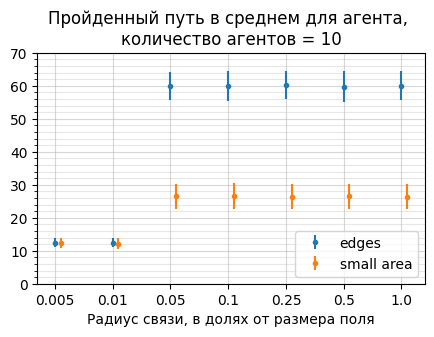

In [37]:
n = 10
files_n = glob.glob(f".././logs/decentralized/*/*_{n}.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = f"количество агентов = {n}"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_n, column)
    plot_mean_and_std(storage, np.unique(list(get_radius(files_n))), title + ", \n" + details,
                      "Радиус связи, в долях от размера поля")

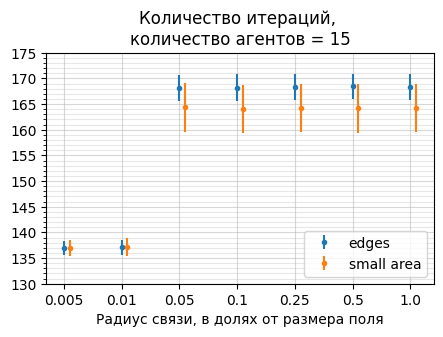

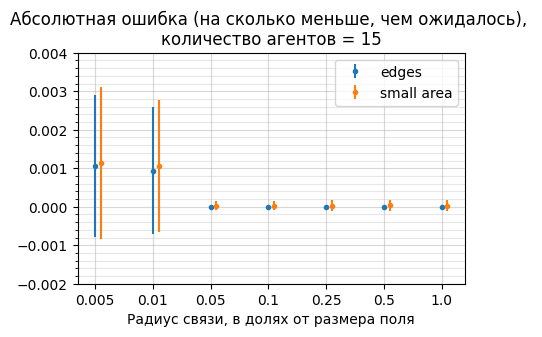

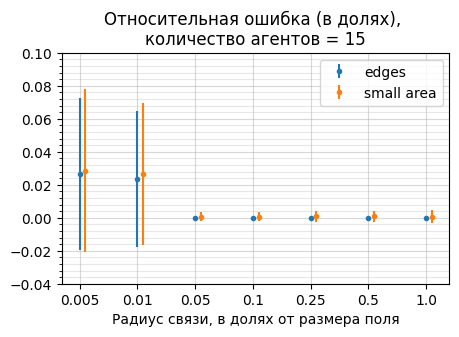

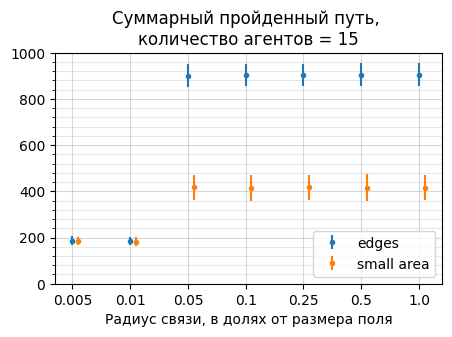

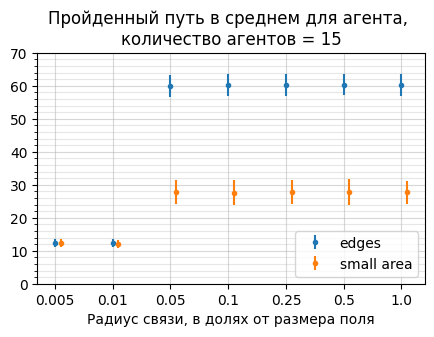

In [38]:
n = 15
files_n = glob.glob(f".././logs/decentralized/*/*_{n}.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = f"количество агентов = {n}"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_n, column)
    plot_mean_and_std(storage, np.unique(list(get_radius(files_n))), title + ", \n" + details,
                      "Радиус связи, в долях от размера поля")

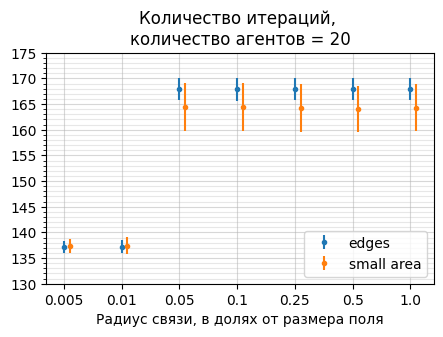

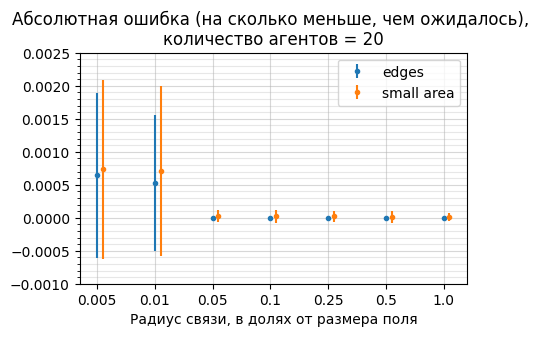

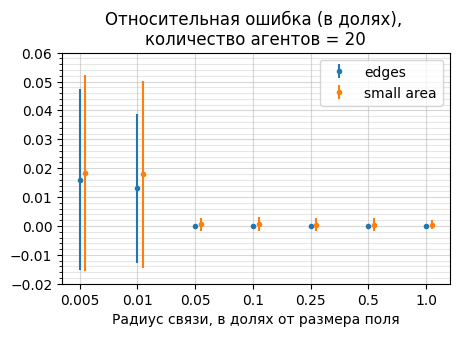

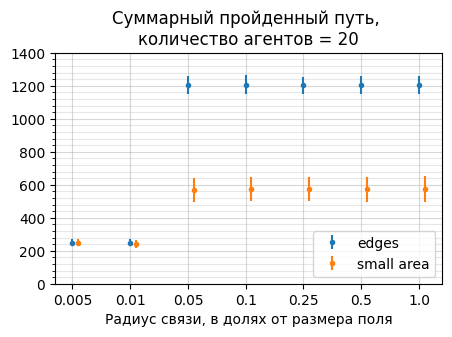

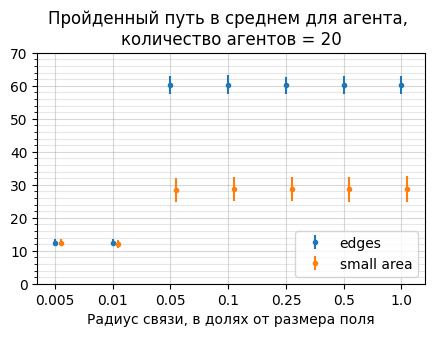

In [39]:
n = 20
files_n = glob.glob(f".././logs/decentralized/*/*_{n}.csv")

columns = ["n_iterations", "absolute_error", "relative_error",
           "total_path", "average_path"]
titles = ["Количество итераций", "Абсолютная ошибка (на сколько меньше, чем ожидалось)",
          "Относительная ошибка (в долях)", "Суммарный пройденный путь", 
          "Пройденный путь в среднем для агента"]

details = f"количество агентов = {n}"

for column, title in zip(columns, titles):
    storage = compute_mean_and_std(files_n, column)
    plot_mean_and_std(storage, np.unique(list(get_radius(files_n))), title + ", \n" + details,
                      "Радиус связи, в долях от размера поля")

In [40]:
storage = defaultdict(list)

for file in files:
    data = pd.read_csv(file)
    n_particles, spawn_type = get_params_from_path(file)
    
    value_count = data['exit_code'].value_counts()
    storage[spawn_type].append([value_count[1], value_count[2], n_particles])

for current_spawn_type in storage.keys():
    storage[current_spawn_type] = sorted(storage[current_spawn_type], key = lambda x: x[2])
    storage[current_spawn_type] = np.array(storage[current_spawn_type])

NameError: name 'files' is not defined

In [ ]:
data = pd.read_csv(files[0])
codes = list(data['exit_code'].value_counts().index)
n_codes = len(codes)

In [ ]:
code2label = {1: "around answer", 2: "small velocity"}

In [ ]:
n_keys = len(storage.keys())

width = 0.8 / n_keys

x = np.arange(len(storage[list(storage.keys())[0]][:, 2]))

fig, axes = plt.subplots(1, n_keys, figsize=(4*n_keys,6), sharey=True)

for index_i, key in enumerate(storage.keys()):
    for index_j in range(n_codes):
        axes[index_i].bar(x + index_j*width, storage[key][:, index_j], width=width, label = code2label[index_j+1])
        
    axes[index_i].set_xticks(x)
    axes[index_i].set_xticklabels(storage[key][:, 2])
    
    axes[index_i].grid(which="major", alpha=0.5)
    
    locs = axes[index_i].get_yticks()
    
    minor_ticks = []
    for i in range(1, len(locs)):
        start = locs[i-1]
        finish = locs[i]
        for minor_tick in np.linspace(start, finish, 5, endpoint=False):
            minor_ticks.append(minor_tick)
    
    axes[index_i].set_yticks(minor_ticks, minor=True)
    axes[index_i].grid(which="minor", alpha=0.3)
    
    axes[index_i].legend()
    axes[index_i].set_title('Генерация ' + '"' + str(key) + '"')
    
plt.show()